In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib as mpl
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data_path = 'DataCoSupplyChainDataset.csv'

# 1 Data Preprocessing

In [17]:
df = pd.read_csv(data_path, encoding='ISO-8859-1')

# drop unnecessary columns
df.drop(columns=['Product Description', 'Order Zipcode', 'Product Status', 'Customer Password', 'Customer Email', 'Product Image'], inplace=True)

# Identify rows where 'Customer Lname' or 'Customer Zipcode' are missing
missing_rows = df[df['Customer Lname'].isnull() | df['Customer Zipcode'].isnull()]

# Print the rows that will be removed
print("The following rows are being removed due to missing 'Customer Lname' or 'Customer Zipcode':")
print(missing_rows.index.tolist())

# Drop those rows from the DataFrame
df.drop(index=missing_rows.index, inplace=True)

df.reset_index(drop=True, inplace=True)

df.head()

The following rows are being removed due to missing 'Customer Lname' or 'Customer Zipcode':
[35704, 41422, 46440, 50447, 82511, 86260, 92621, 97530, 120404, 166129, 167119]


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class


In [4]:
df_top3 = df.head(3)

for col in df_top3.columns:
    values = df_top3[col].tolist()
    values_str = ','.join(map(str, values))
    print(f"{col}：{values_str}")

Type：DEBIT,TRANSFER,CASH
Days for shipping (real)：3,5,4
Days for shipment (scheduled)：4,4,4
Benefit per order：91.25,-249.0899963,-247.7799988
Sales per customer：314.6400146,311.3599854,309.7200012
Delivery Status：Advance shipping,Late delivery,Shipping on time
Late_delivery_risk：0,1,0
Category Id：73,73,73
Category Name：Sporting Goods,Sporting Goods,Sporting Goods
Customer City：Caguas,Caguas,San Jose
Customer Country：Puerto Rico,Puerto Rico,EE. UU.
Customer Fname：Cally,Irene,Gillian
Customer Id：20755,19492,19491
Customer Lname：Holloway,Luna,Maldonado
Customer Segment：Consumer,Consumer,Consumer
Customer State：PR,PR,CA
Customer Street：5365 Noble Nectar Island,2679 Rustic Loop,8510 Round Bear Gate
Customer Zipcode：725.0,725.0,95125.0
Department Id：2,2,2
Department Name：Fitness,Fitness,Fitness
Latitude：18.2514534,18.27945137,37.29223251
Longitude：-66.03705597,-66.0370636,-121.881279
Market：Pacific Asia,Pacific Asia,Pacific Asia
Order City：Bekasi,Bikaner,Bikaner
Order Country：Indonesia,India

# 2 EDA Analysis

## 2.1 Profit Validation & Overview

### 2.1.1 Initial Profit Assessment

#### 2.1.1.1 Profit over Time Analysis (Bivariate)

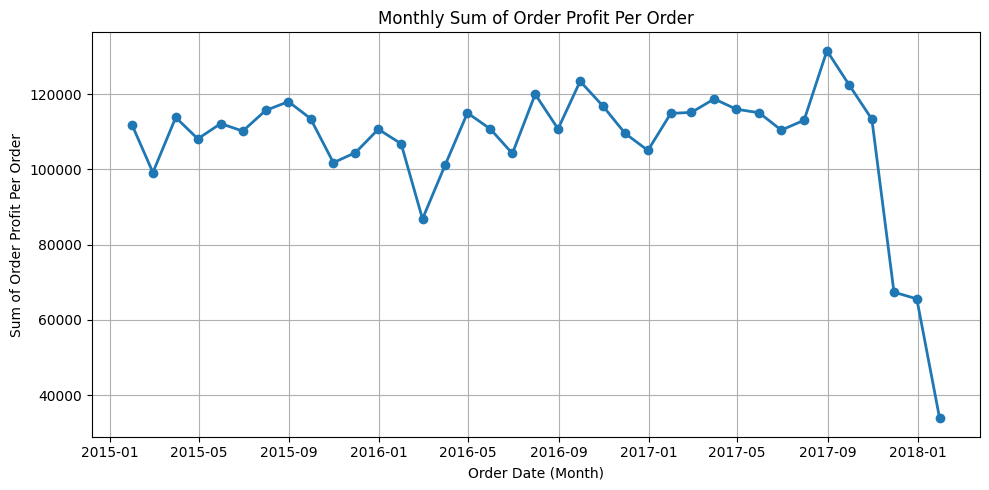

In [10]:
# data type conversion
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], format='%m/%d/%Y %H:%M')

# Order Profit Per Order
df_monthly = (
    df
    .set_index('order date (DateOrders)')
    .resample('ME')['Order Profit Per Order']
    .sum()   #  .mean()
    .reset_index()
)

# plot
plt.figure(figsize=(10, 5))
plt.plot(
    df_monthly['order date (DateOrders)'],
    df_monthly['Order Profit Per Order'],
    marker='o',
    linewidth=2
)
plt.title('Monthly Sum of Order Profit Per Order')
plt.xlabel('Order Date (Month)')
plt.ylabel('Sum of Order Profit Per Order')
plt.grid(True)
plt.tight_layout()
plt.show()


- Profit showed some seasonality.
- After September 2017, profit plunged sharply, indicating significant company issues (e.g., soaring costs, decreased order volume or profit margins) that require urgent root cause investigation and corrective actions.

#### 2.1.1.2 Profit Distribution Analysis (Univariate)

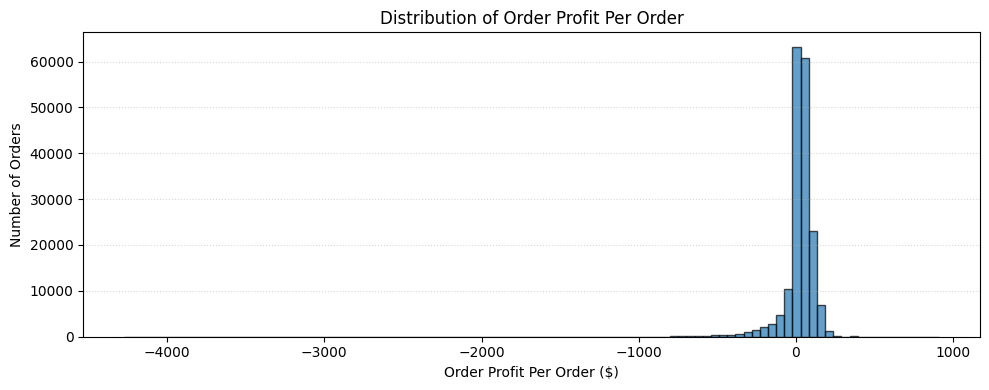

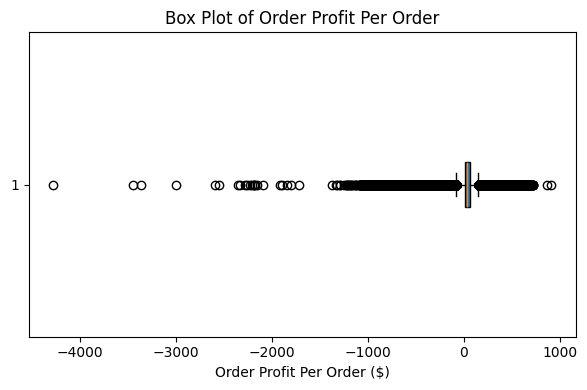

In [11]:
# 1. Extract the profit series
profit = df['Order Profit Per Order']

# 2. Plot histogram
plt.figure(figsize=(10, 4))
plt.hist(
    profit,
    bins=100,             # adjust bin size as needed
    edgecolor='black',
    alpha=0.7
)
plt.title('Distribution of Order Profit Per Order')
plt.xlabel('Order Profit Per Order ($)')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Plot box plot
plt.figure(figsize=(6, 4))
plt.boxplot(
    profit,
    vert=False,
    showfliers=True,      # show outliers
    patch_artist=True
)
plt.title('Box Plot of Order Profit Per Order')
plt.xlabel('Order Profit Per Order ($)')
plt.tight_layout()
plt.show()


- Most order profits are concentrated between 0-200.
- A significant number of orders show substantial losses, including extreme negative profit outliers (down to approx. -2500).

#### 2.1.1.3 Negative Profit Analysis (Univariate)

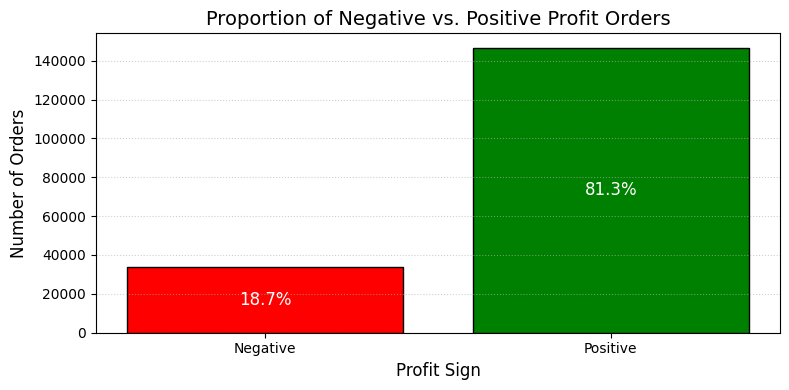

In [12]:
# 1. Derive a sign column
df['Profit Sign'] = df['Order Profit Per Order'].apply(lambda x: 'Negative' if x < 0 else 'Positive')

# 2. Compute counts and percentages
sign_counts = df['Profit Sign'].value_counts().sort_index()
sign_pct    = sign_counts / sign_counts.sum() * 100

# 3. Plot bar chart of counts
plt.figure(figsize=(8, 4))
bars = plt.bar(
    sign_counts.index,
    sign_counts.values,
    color=['red', 'green'],
    edgecolor='black'
)

# 4. Annotate percentages on bars
for bar, pct in zip(bars, sign_pct):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 0.5,
        f"{pct:.1f}%",
        ha='center',
        va='center',
        color='white',
        fontsize=12
    )

# 5. Titles and labels
plt.title('Proportion of Negative vs. Positive Profit Orders', fontsize=14)
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Profit Sign', fontsize=12)

# 6. Grid & layout
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

- Loss-making orders, though less than one-fifth of the total, represent a significant absolute number.
- This highlights that these orders are a critical business issue needing attention.

### 2.1.2 Profit vs Sales Relationship

#### 2.1.2.1 Sales-Profit Correlation Analysis (Bivariate)

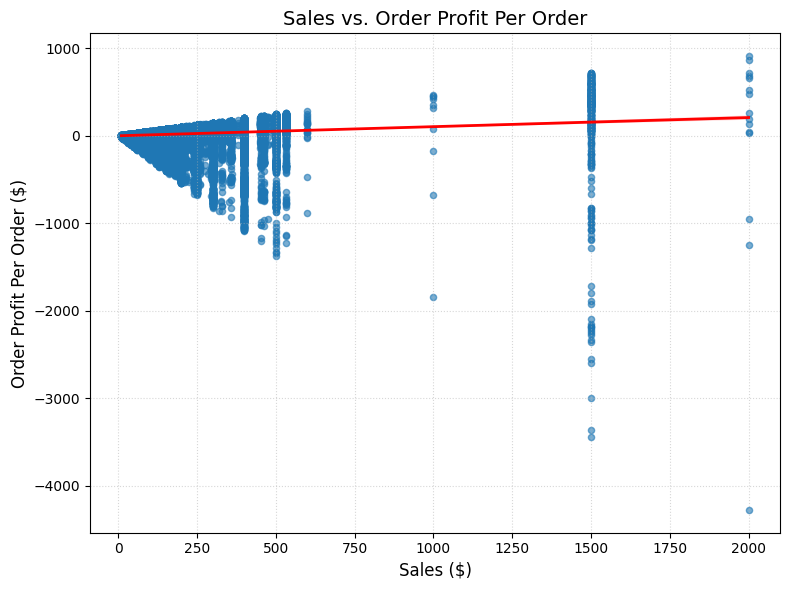

In [13]:
# 1. Load and preprocess data (assumes df is already preprocessed)
#    Ensure df['Sales'] and df['Order Profit Per Order'] exist and are numeric.

# 2. Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Sales',
    y='Order Profit Per Order',
    data=df,
    scatter_kws={'s': 20, 'alpha': 0.6},
    line_kws={'color': 'red', 'linewidth': 2}
)

# 3. Titles and labels
plt.title('Sales vs. Order Profit Per Order', fontsize=14)
plt.xlabel('Sales ($)',                   fontsize=12)
plt.ylabel('Order Profit Per Order ($)',  fontsize=12)

# 4. Grid and layout
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()

# 5. Display plot
plt.show()


- Most orders (0-500 sales) show profits near 0.
- Profit variability increases with higher sales.
- High-sales orders (especially >750) frequently incur significant losses, some exceeding 4000.
- Substantial loss risk exists for high-value orders, evident from the spread in high-sales negative profit areas.

#### 2.1.2.2 Sales vs Profit Divergence (Multivariate)

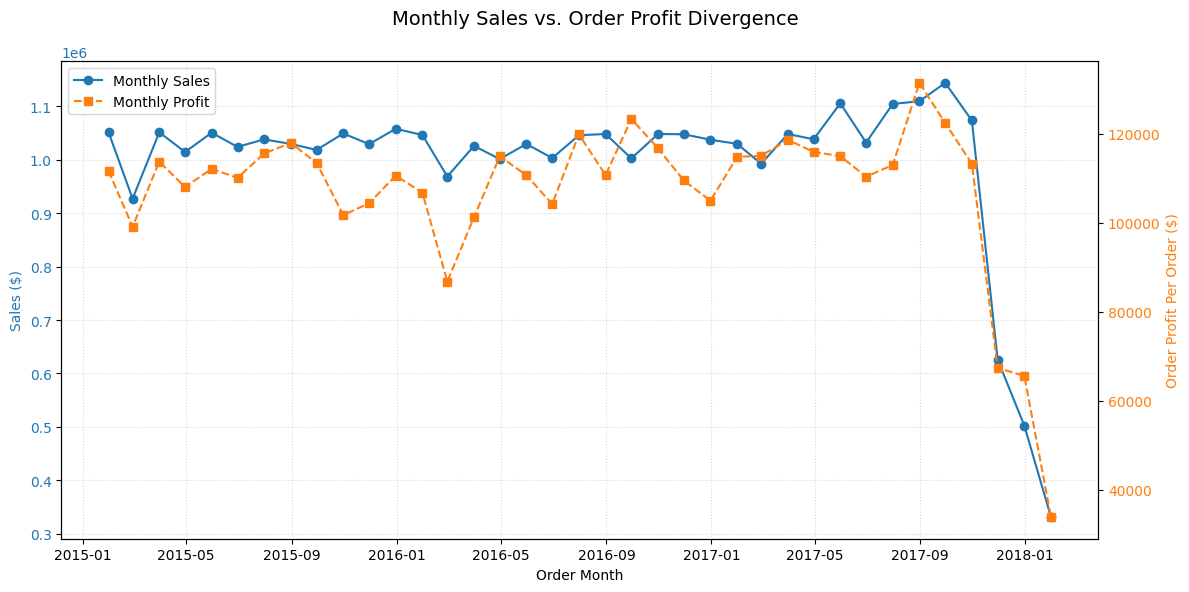

In [15]:
# 1. Ensure datetime and monthly grouping
df['order_date_clean'] = pd.to_datetime(df['order date (DateOrders)'], format='%m/%d/%Y %H:%M')
monthly = df.set_index('order_date_clean').resample('ME').agg({
    'Sales': 'sum',
    'Order Profit Per Order': 'sum'
})

# 2. Plot dual-axis time series
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Sales on primary y-axis
ax1.plot(
    monthly.index,
    monthly['Sales'],
    color='tab:blue',
    marker='o',
    label='Monthly Sales'
)
ax1.set_xlabel('Order Month')
ax1.set_ylabel('Sales ($)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create secondary y-axis for Profit
ax2 = ax1.twinx()
ax2.plot(
    monthly.index,
    monthly['Order Profit Per Order'],
    color='tab:orange',
    marker='s',
    linestyle='--',
    label='Monthly Profit'
)
ax2.set_ylabel('Order Profit Per Order ($)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 3. Titles, legends, grid
fig.suptitle('Monthly Sales vs. Order Profit Divergence', fontsize=14)
ax1.grid(True, linestyle=':', alpha=0.5)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


- From early 2015 to mid-2017, sales and profit were largely stable and in sync.
- From September 2017, both sales and profit plunged dramatically, with profit declining significantly more, indicating a clear divergence.
- By January 2018, both reached historical lows.

## 2.2 Root Cause Analysis - Operational Factors

### 2.2.1 Shipping & Delivery Impact

#### 2.2.1.1 Late Delivery Risk Impact (Bivariate)

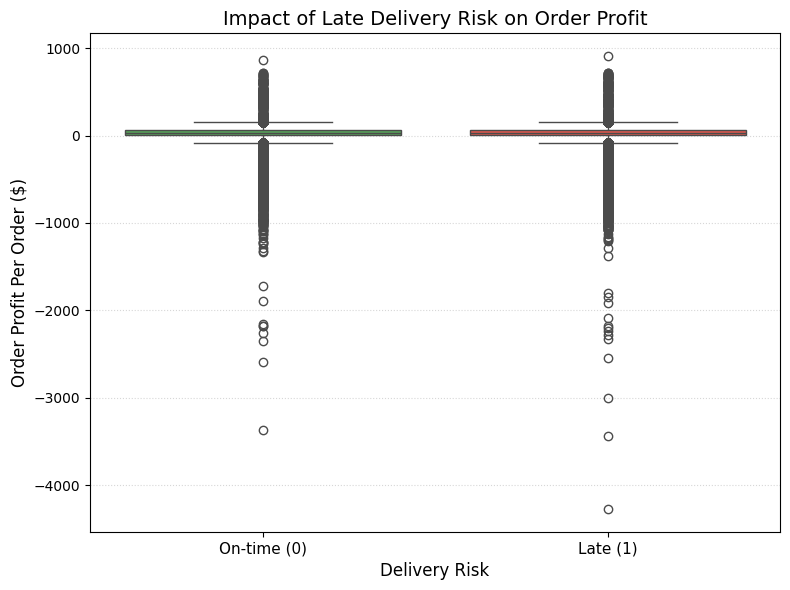

In [17]:
# 1. Ensure the risk column is integer or category
df['Late_delivery_risk'] = df['Late_delivery_risk'].astype(int)

# 2. Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Late_delivery_risk',
    y='Order Profit Per Order',
    hue='Late_delivery_risk',
    data=df,
    palette={0: '#4CAF50', 1: '#F44336'},
    legend=False,
    showfliers=True
)

# 3. Customize x-tick labels
plt.xticks(
    [0, 1],
    ['On-time (0)', 'Late (1)'],
    fontsize=11
)

# 4. Add titles and labels
plt.title('Impact of Late Delivery Risk on Order Profit', fontsize=14)
plt.xlabel('Delivery Risk',                                    fontsize=12)
plt.ylabel('Order Profit Per Order ($)',                        fontsize=12)

# 5. Add grid and layout
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()

# 6. Display plot
plt.show()

- Late delivery has no significant impact on median order profit, with both delayed and on-time orders showing medians near zero.
- Profit distribution, box tightness, and outlier ranges are similar for both groups, with many negative profit outliers.
- Late delivery itself does not seem to be a primary factor causing order losses or affecting profitability, based solely on order profit.

#### 2.2.1.2 Shipping Mode Profitability (Bivariate)

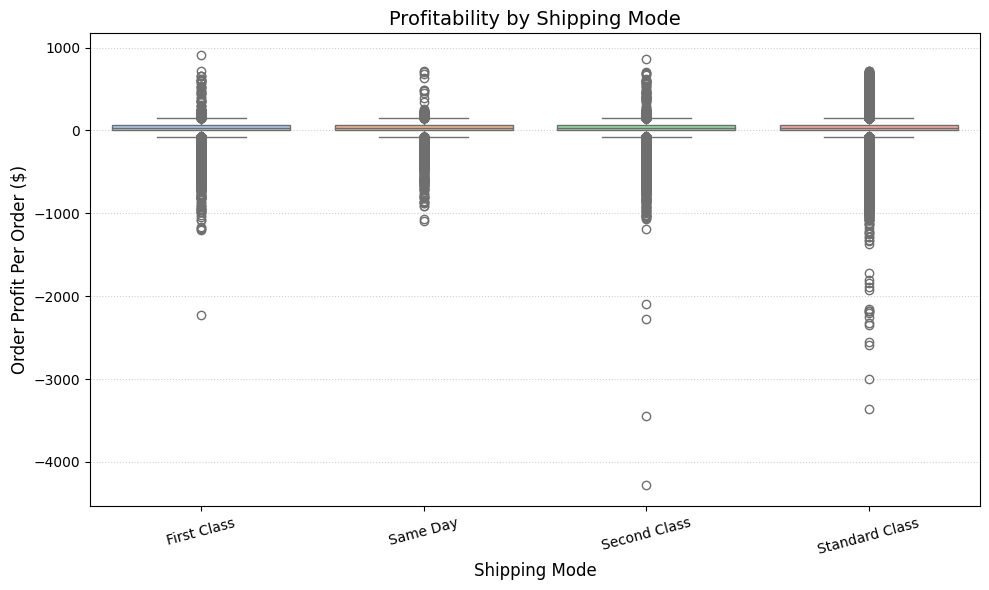

In [19]:
# 1. Ensure the shipping mode column is categorical
df['Shipping Mode'] = df['Shipping Mode'].astype('category')

# 2. Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# 3. Draw boxplot with hue set
sns.boxplot(
    x='Shipping Mode',
    y='Order Profit Per Order',
    hue='Shipping Mode',       # 添加 hue
    data=df,
    palette='pastel',
    legend=False,
    showfliers=True
)

# 4. Customize plot
plt.title('Profitability by Shipping Mode', fontsize=14)
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Order Profit Per Order ($)', fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


- Profit distribution is highly similar across all shipping modes.
- Medians for all modes are near zero, with narrow boxes, indicating low profits for most orders.
- All modes show numerous negative profit outliers and similar extreme losses.
- Shipping mode itself doesn't appear to be a primary factor causing losses or impacting profitability.

#### 2.2.1.3 Shipping Delay Impact (Bivariate)

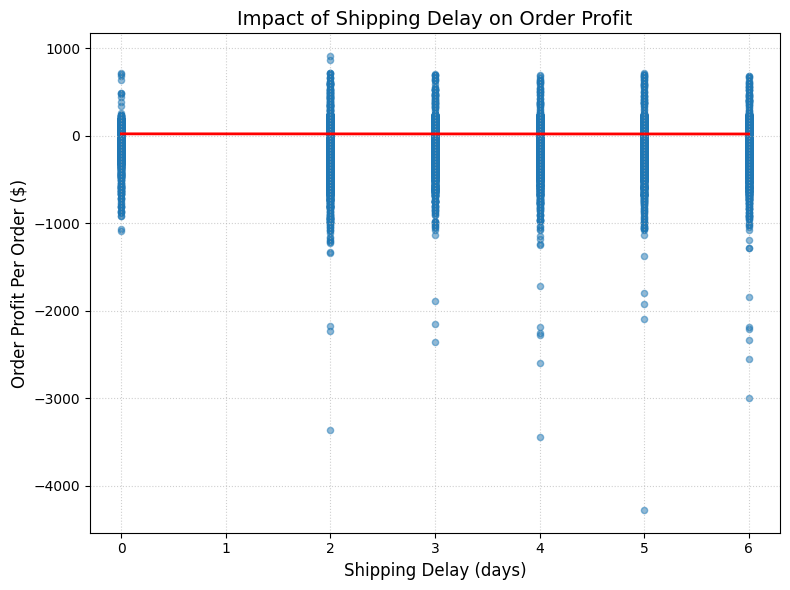

In [20]:
df['delay_days'] = (pd.to_datetime(df['shipping date (DateOrders)'], format='%m/%d/%Y %H:%M')
                   - pd.to_datetime(df['order date (DateOrders)'],   format='%m/%d/%Y %H:%M')).dt.days

# 2. Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    x='delay_days',
    y='Order Profit Per Order',
    data=df,
    scatter_kws={'s': 20, 'alpha': 0.5},
    line_kws={'color': 'red', 'linewidth': 2}
)

# 3. Titles and axis labels
plt.title('Impact of Shipping Delay on Order Profit', fontsize=14)
plt.xlabel('Shipping Delay (days)',                   fontsize=12)
plt.ylabel('Order Profit Per Order ($)',              fontsize=12)

# 4. Grid and layout
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


- Most orders have 0-6 days shipping delay.
- No clear linear relationship exists between shipping delay and order profit; the regression line is nearly horizontal.
- Profit distribution for all delay durations is concentrated around zero, with numerous negative profit outliers (up to approx. -4000).
- This suggests delay itself is not a primary profit driver; losses are likely due to deeper underlying factors.

#### 2.2.1.4 Geographic Shipping Efficiency (Multivariate)

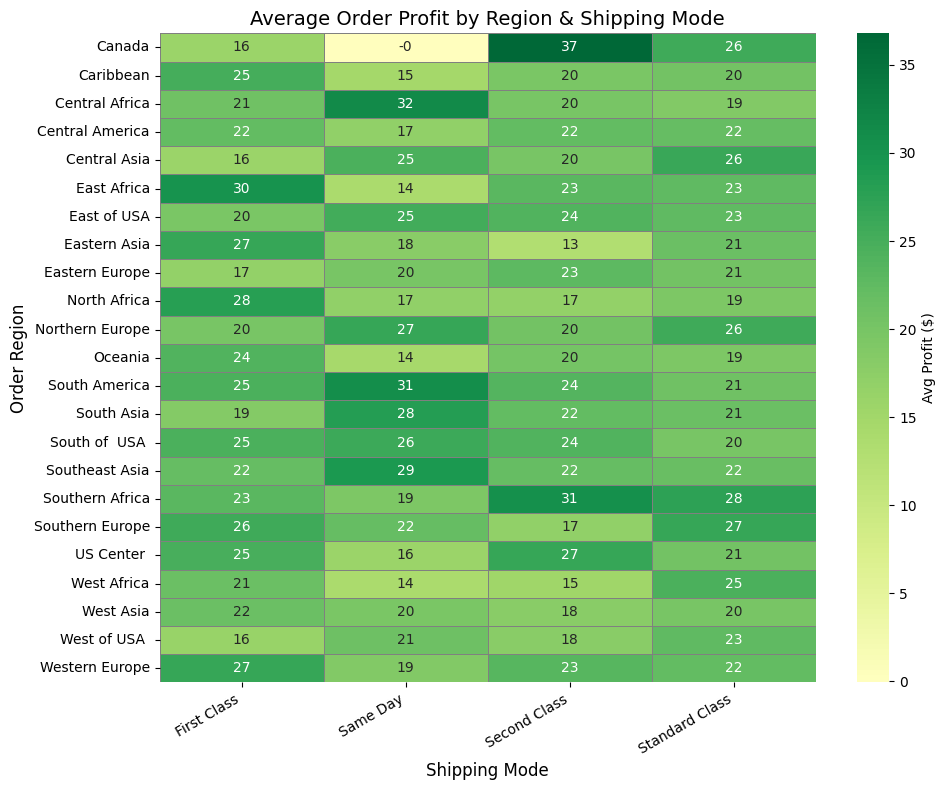

In [22]:
# 1. Compute a pivot table of average profit by region and mode
pivot = df.pivot_table(
    index='Order Region',
    columns='Shipping Mode',
    values='Order Profit Per Order',
    aggfunc='mean',
    observed=False
)

# 2. Sort regions or modes if desired
# pivot = pivot.sort_index()              # alphabetical regions
# pivot = pivot[['Standard Class','Second Class','First Class','Same Day']]

# 3. Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    pivot,
    annot=True,                   # show numbers in cells
    fmt='.0f',                    # integer formatting
    cmap='RdYlGn',                # red→yellow→green colormap
    center=0,                     # center the color scale at zero
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Avg Profit ($)'}
)

# 4. Titles and labels
plt.title('Average Order Profit by Region & Shipping Mode', fontsize=14)
plt.xlabel('Shipping Mode',                     fontsize=12)
plt.ylabel('Order Region',                      fontsize=12)

# 5. Improve layout
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- Profitability varies significantly by region-shipping mode pairing.
- Most combinations show moderate profits (15-35), while "Canada - Same Day" is the only one with negative average profit.
- Some pairings, like "North America - Same Day" and "Oceania - Second Class", demonstrate higher average profits, warranting further attention.

### 2.2.2 Discount Strategy Analysis

#### 2.2.2.1 Discount vs Profit Relationship (Bivariate)

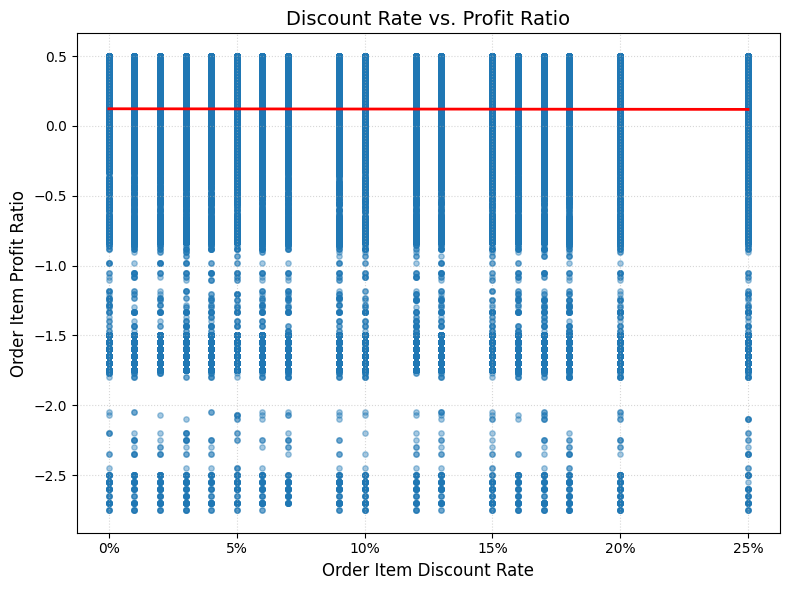

In [23]:
df['Order Item Discount Rate']   = pd.to_numeric(df['Order Item Discount Rate'],   errors='coerce')
df['Order Item Profit Ratio']    = pd.to_numeric(df['Order Item Profit Ratio'],    errors='coerce')

# 2. Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Order Item Discount Rate',
    y='Order Item Profit Ratio',
    data=df,
    scatter_kws={'s': 15, 'alpha': 0.4},
    line_kws={'color': 'red', 'linewidth': 2}
)

# 3. Titles and axis formatting
plt.title('Discount Rate vs. Profit Ratio', fontsize=14)
plt.xlabel('Order Item Discount Rate',   fontsize=12)
plt.ylabel('Order Item Profit Ratio',    fontsize=12)

# Format x-axis as percentage
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{v:.0%}"))

# 4. Grid and layout
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

- Profit ratios vary widely (positive to deeply negative, ≤ -2.5) at all discount rates.
- No clear linear correlation exists between discount rate and profit ratio, as indicated by the nearly horizontal regression line.
- Negative profit ratios are common across all discount rates, including deeply negative ones, aligning with prior observations.

#### 2.2.2.2 Discount Strategy Trends (Multivariate)

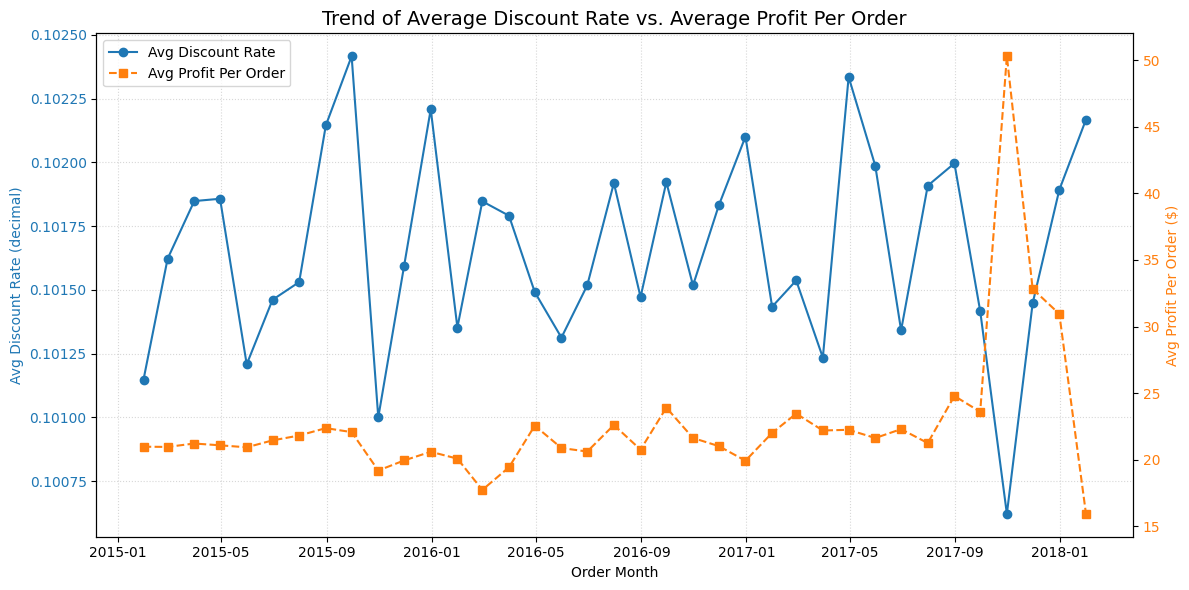

In [26]:
# 1. Prepare datetime index and resample
df['order_date_clean'] = pd.to_datetime(df['order date (DateOrders)'], format='%m/%d/%Y %H:%M')
monthly = df.set_index('order_date_clean').resample('ME').agg({
    'Order Item Discount Rate': 'mean',
    'Order Profit Per Order':        'mean'
})

# 2. Plot dual‐axis time series
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average discount rate on primary axis
ax1.plot(
    monthly.index,
    monthly['Order Item Discount Rate'],
    color='tab:blue',
    marker='o',
    label='Avg Discount Rate'
)
ax1.set_xlabel('Order Month')
ax1.set_ylabel('Avg Discount Rate', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
# ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{v:.0%}"))
ax1.set_ylabel('Avg Discount Rate (decimal)')

# Plot average profit on secondary axis
ax2 = ax1.twinx()
ax2.plot(
    monthly.index,
    monthly['Order Profit Per Order'],
    color='tab:orange',
    marker='s',
    linestyle='--',
    label='Avg Profit Per Order'
)
ax2.set_ylabel('Avg Profit Per Order ($)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# 3. Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 4. Titles, grid, layout
plt.title('Trend of Average Discount Rate vs. Average Profit Per Order', fontsize=14)
ax1.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

- The monthly average discount rate fluctuated minimally, almost negligibly.
- Conversely, monthly average order profit, stable until mid-2017, sharply declined in late 2017 to early 2018.
- This indicates minimal correlation between discount rate fluctuations and the sharp profit decline, suggesting other, more significant factors are at play.

#### 2.2.2.3 Category Discount Impact (Multivariate)

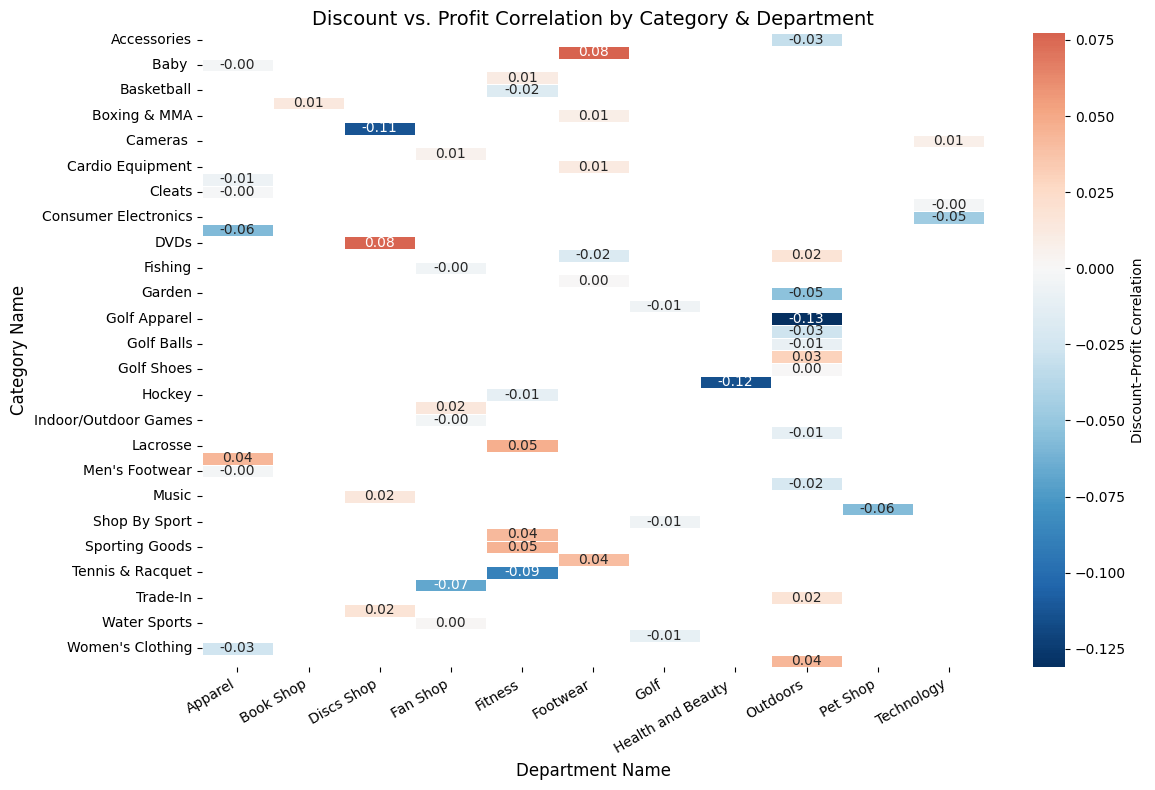

In [29]:
# 1. Compute correlation per category-department group
corr_df = (
    df
    .groupby(['Category Name', 'Department Name'])[
        ['Order Item Profit Ratio', 'Order Item Discount Rate']
    ]
    .apply(lambda x: x['Order Item Profit Ratio'].corr(x['Order Item Discount Rate']))
    .reset_index(name='discount_profit_corr')
)


# 2. Pivot to wide form
pivot_corr = corr_df.pivot(
    index='Category Name',
    columns='Department Name',
    values='discount_profit_corr'
)

# 3. Plot heatmap of correlation
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_corr,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',       # red = negative corr, blue = positive corr
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Discount–Profit Correlation'}
)
plt.title('Discount vs. Profit Correlation by Category & Department', fontsize=14)
plt.xlabel('Department Name', fontsize=12)
plt.ylabel('Category Name', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- No significant direct linear relationship exists between discount rate and profit margin across most categories and departments.
- While some combinations show stronger negative correlation (higher discounts lead to lower profits), others exhibit a slight positive correlation (higher discounts slightly increase profits), possibly due to other factors or noise.

## 2.3 Product & Category Analysis

### 2.3.1 Product Performance

#### 2.3.1.1 Category Profitability Analysis (Multivariate)

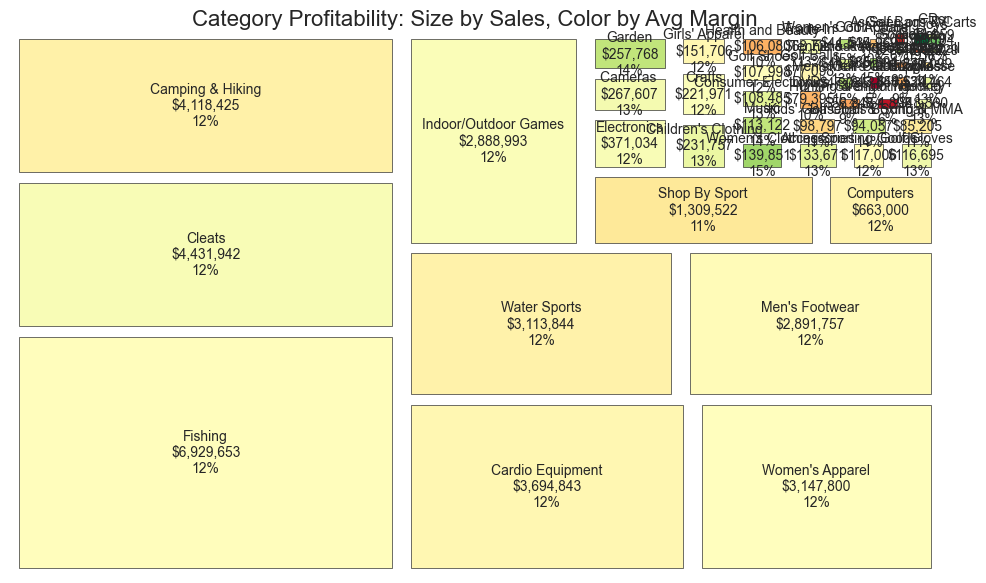

                       total_sales  avg_margin
Category Name                                 
Fishing               6.929654e+06    0.121449
Cleats                4.431943e+06    0.124608
Camping & Hiking      4.118426e+06    0.115947
Cardio Equipment      3.694843e+06    0.118835
Women's Apparel       3.147800e+06    0.122193
Water Sports          3.113845e+06    0.116487
Men's Footwear        2.891758e+06    0.120123
Indoor/Outdoor Games  2.888994e+06    0.123936
Shop By Sport         1.309522e+06    0.112246
Computers             6.630000e+05    0.117059
Electronics           3.710346e+05    0.124639
Cameras               2.676077e+05    0.126470
Garden                2.577687e+05    0.142521
Children's Clothing   2.317579e+05    0.129507
Crafts                2.219719e+05    0.123617
Girls' Apparel        1.517062e+05    0.118568
Women's Clothing      1.398514e+05    0.151389
Accessories           1.336715e+05    0.132433
Sporting Goods        1.170068e+05    0.121064
Golf Gloves  

In [38]:
# 1. Aggregate by category
agg = (
    df
    .groupby('Category Name')
    .agg({
        'Sales': 'sum',
        'Order Item Profit Ratio': 'mean'
    })
    .rename(columns={
        'Sales': 'total_sales',
        'Order Item Profit Ratio': 'avg_margin'
    })
    .sort_values('total_sales', ascending=False)
)

# 2. Prepare data for treemap
labels = [
    f"{cat}\n${int(sales):,}\n{margin:.0%}"
    for cat, sales, margin in zip(agg.index, agg['total_sales'], agg['avg_margin'])
]
sizes = agg['total_sales'].values
colors = mpl.cm.RdYlGn((agg['avg_margin'] - agg['avg_margin'].min())
                       / (agg['avg_margin'].max() - agg['avg_margin'].min()))

# 3. Plot treemap
plt.figure(figsize=(12, 7))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    pad=True,
    bar_kwargs={'linewidth':0.5, 'edgecolor':'#333'}
)

plt.title('Category Profitability: Size by Sales, Color by Avg Margin', fontsize=16)
plt.axis('off')
plt.show()

print(agg)

- Most high-sales categories maintain good profitability.
- However, smaller segments with either high or low margins still warrant attention.

#### 2.3.1.2 Product Lifecycle Profitability (Multivariate)

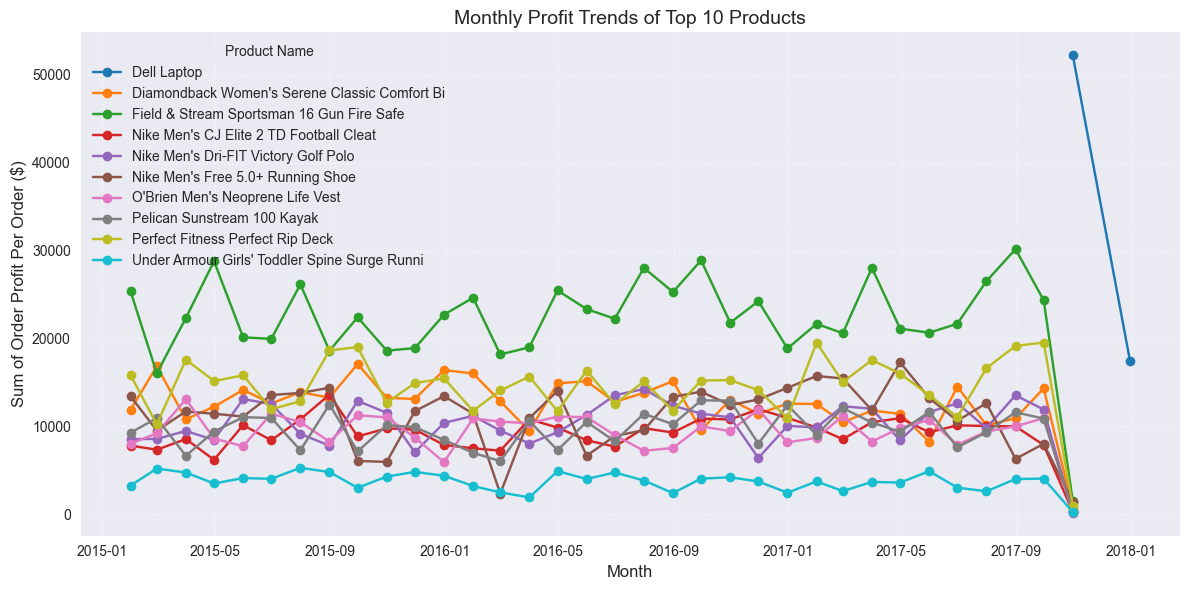

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Parse dates
df['order_dt'] = pd.to_datetime(df['order date (DateOrders)'], format='%m/%d/%Y %H:%M')

# 2. Compute total profit per product and pick Top 10
product_profit = (
    df
    .groupby('Product Name')['Order Profit Per Order']
    .sum()
    .nlargest(10)
)
top_products = product_profit.index.tolist()

# 3. Prepare monthly profit data for Top 5
monthly = (
    df[df['Product Name'].isin(top_products)]
    .set_index('order_dt')
    .groupby([pd.Grouper(freq='M'), 'Product Name'])['Order Profit Per Order']
    .sum()
    .unstack()
)

# 4. Choose a qualitative colormap with at least 5 distinct colors
colors = plt.cm.tab10.colors  # tab10 has 10 distinct colors

# 5. Plot line chart with explicit colors
plt.figure(figsize=(12, 6))
for i, product in enumerate(monthly.columns):
    plt.plot(
        monthly.index,
        monthly[product],
        marker='o',
        label=product,
        color=colors[i]          # assign a unique color from the palette
    )

# 6. Titles, labels, legend
plt.title('Monthly Profit Trends of Top 10 Products', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sum of Order Profit Per Order ($)', fontsize=12)
plt.legend(title='Product Name', loc='upper left', fontsize=10)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

- Most products had stable monthly profits (peaks $20k-$30k) from early 2015 to late 2017.
- From late 2017, all products saw a widespread and significant profit decline, often to near-zero or negative levels.
- Dell Laptop showed exceptionally sharp profit fluctuations in late 2017/early 2018, with its profit scale significantly surpassing others.
- This simultaneous product-line profit plunge in late 2017 aligns with the overall decline, suggesting potential systemic issues.

#### 2.3.1.3 Price Point Optimization (Bivariate)

<Figure size 1200x600 with 0 Axes>

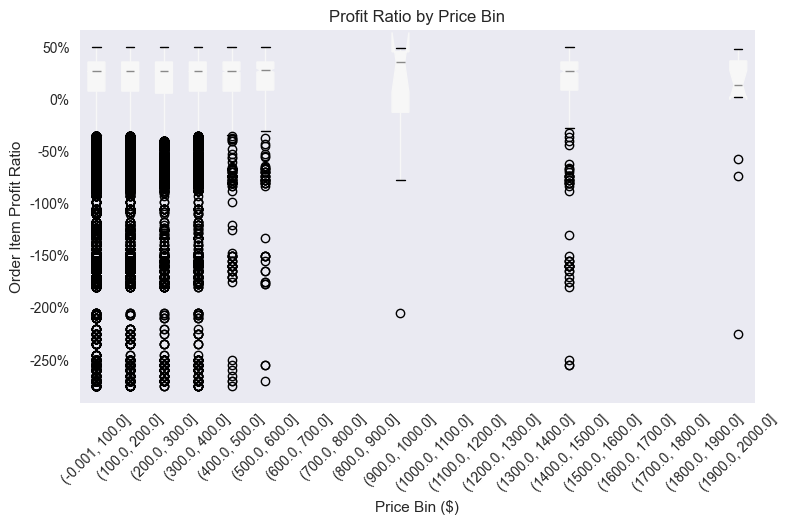

In [45]:
# 1. Define bin edges for price (e.g., every $100)
bin_edges = range(0, int(df['Order Item Product Price'].max()) + 100, 100)

# 2. Create a new column for price bins
df['price_bin'] = pd.cut(
    df['Order Item Product Price'],
    bins=bin_edges,
    include_lowest=True
)

# 3. Prepare data: extract price_bin and profit ratio
data = df[['price_bin', 'Order Item Profit Ratio']].dropna()

# 4. Plot box plot
plt.figure(figsize=(12, 6))
data.boxplot(
    column='Order Item Profit Ratio',
    by='price_bin',
    grid=False,
    rot=45,                   # rotate x labels
    notch=True,               # draw notches
    patch_artist=True         # fill boxes
)

# 5. Titles and labels
plt.suptitle('')             # remove default title
plt.title('Profit Ratio by Price Bin')
plt.xlabel('Price Bin ($)')
plt.ylabel('Order Item Profit Ratio')

# 6. Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{v:.0%}"))

# 7. Improve layout
plt.tight_layout()
plt.show()

- Many order items result in losses regardless of price.
- As price increases, deeply unprofitable orders (negative profit ratio outliers) become more numerous and dispersed, with even lower outliers in higher price bins (e.g., above $1000).
- While the median profit ratio is near or above 0% across all price bins, the interquartile range remains consistent, showing no significant trend with increasing price.

### 2.3.2 Inventory & Status Impact

#### 2.3.2.1 Product Status Profitability (Bivariate)

Product Status has been deleted because all its values are the same.

#### 2.3.2.2 Order Quantity Economics (Bivariate)

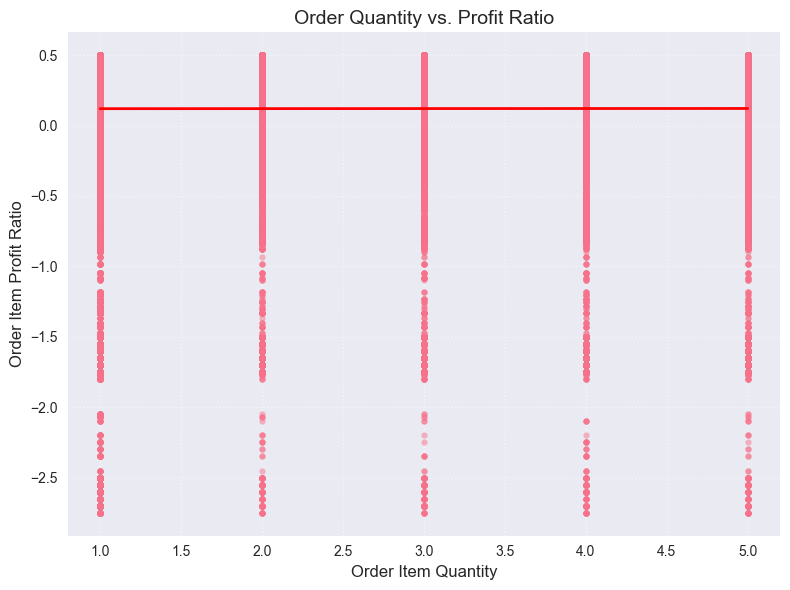

In [47]:
# 1. Ensure numeric types
df['Order Item Quantity']       = pd.to_numeric(df['Order Item Quantity'],       errors='coerce')
df['Order Item Profit Ratio']   = pd.to_numeric(df['Order Item Profit Ratio'],   errors='coerce')

# 2. Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Order Item Quantity',
    y='Order Item Profit Ratio',
    data=df,
    scatter_kws={'s':20, 'alpha':0.5},
    line_kws={'color':'red', 'linewidth':2}
)

# 3. Titles and axis labels
plt.title('Order Quantity vs. Profit Ratio', fontsize=14)
plt.xlabel('Order Item Quantity',            fontsize=12)
plt.ylabel('Order Item Profit Ratio',        fontsize=12)

# 4. Grid and layout
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


- No clear linear relationship exists between order item quantity and profit ratio.
- Profit ratios fluctuate widely (from $\approx$50% positive to ≤-250% negative), with many negative profit orders present at every quantity.

# 3.Further Analysis

**I. Steep Profit Drop and Loss Composition**

Company profit experienced a dramatic decline starting from the latter half of 2017, with the fall in profit significantly exceeding the drop in sales, indicating that deeper issues beyond mere sales fluctuations are at play. A large number of orders yield low profits, while nearly one-fifth of all orders are in a loss-making state, with these unprofitable orders severely eroding overall profit.

**II. High-Value Orders and Operational Risks**

Ironically, high-value orders are more prone to deep losses, challenging the conventional wisdom that "high sales equate to high profits." Furthermore, while individual operational factors like delivery delays or shipping modes have limited impact on profit in isolation, certain combinations of regions and shipping modes (e.g., high-cost same-day delivery in specific areas) show clear negative effects.

**III. Potential Pitfalls in Product and Discount Strategies**

From the latter half of 2017, profits for most core products saw significant declines, suggesting potential issues with concentrated promotions or cost control at the individual product level. Although there isn't a simple linear relationship between discount rates and profit margins, extreme discounts or specific product categories (e.g., in certain niche markets) are indeed linked to lower profits. Moreover, regardless of product price or order quantity, loss-making orders exist, indicating that costs, discounts, and returns are pervasive and complex factors influencing profitability.

## 3.1 Bivariate



1. **Extreme Negative-Profit Order Analysis** - Filter orders with profit < -1000 to analyze their concentration across categories, regions, and customer segments.
2. **Canceled Order Impact Assessment** - Create a cancellation flag to track monthly profit loss trends and category distribution for canceled orders.
3. **Gross Margin Deep Dive** - Calculate profit margin distribution, define profitability tiers, and monitor monthly gross margin trends.
4. **Precise Delay Rate Analysis** - Use relative delay (actual/planned) instead of absolute days to more accurately reflect the impact of delivery performance on profit.
5. **Customer Value Segmentation** - Differentiate between new vs. returning customers, comparing their profit contribution, discount sensitivity, and service performance.
6. **Time Series Diagnosis** - Use Q3 2017 as a demarcation point to compare the first-order performance of new customers in different periods, pinpointing the root cause of the profit decline.

Extreme loss orders: 76 (0.04%)


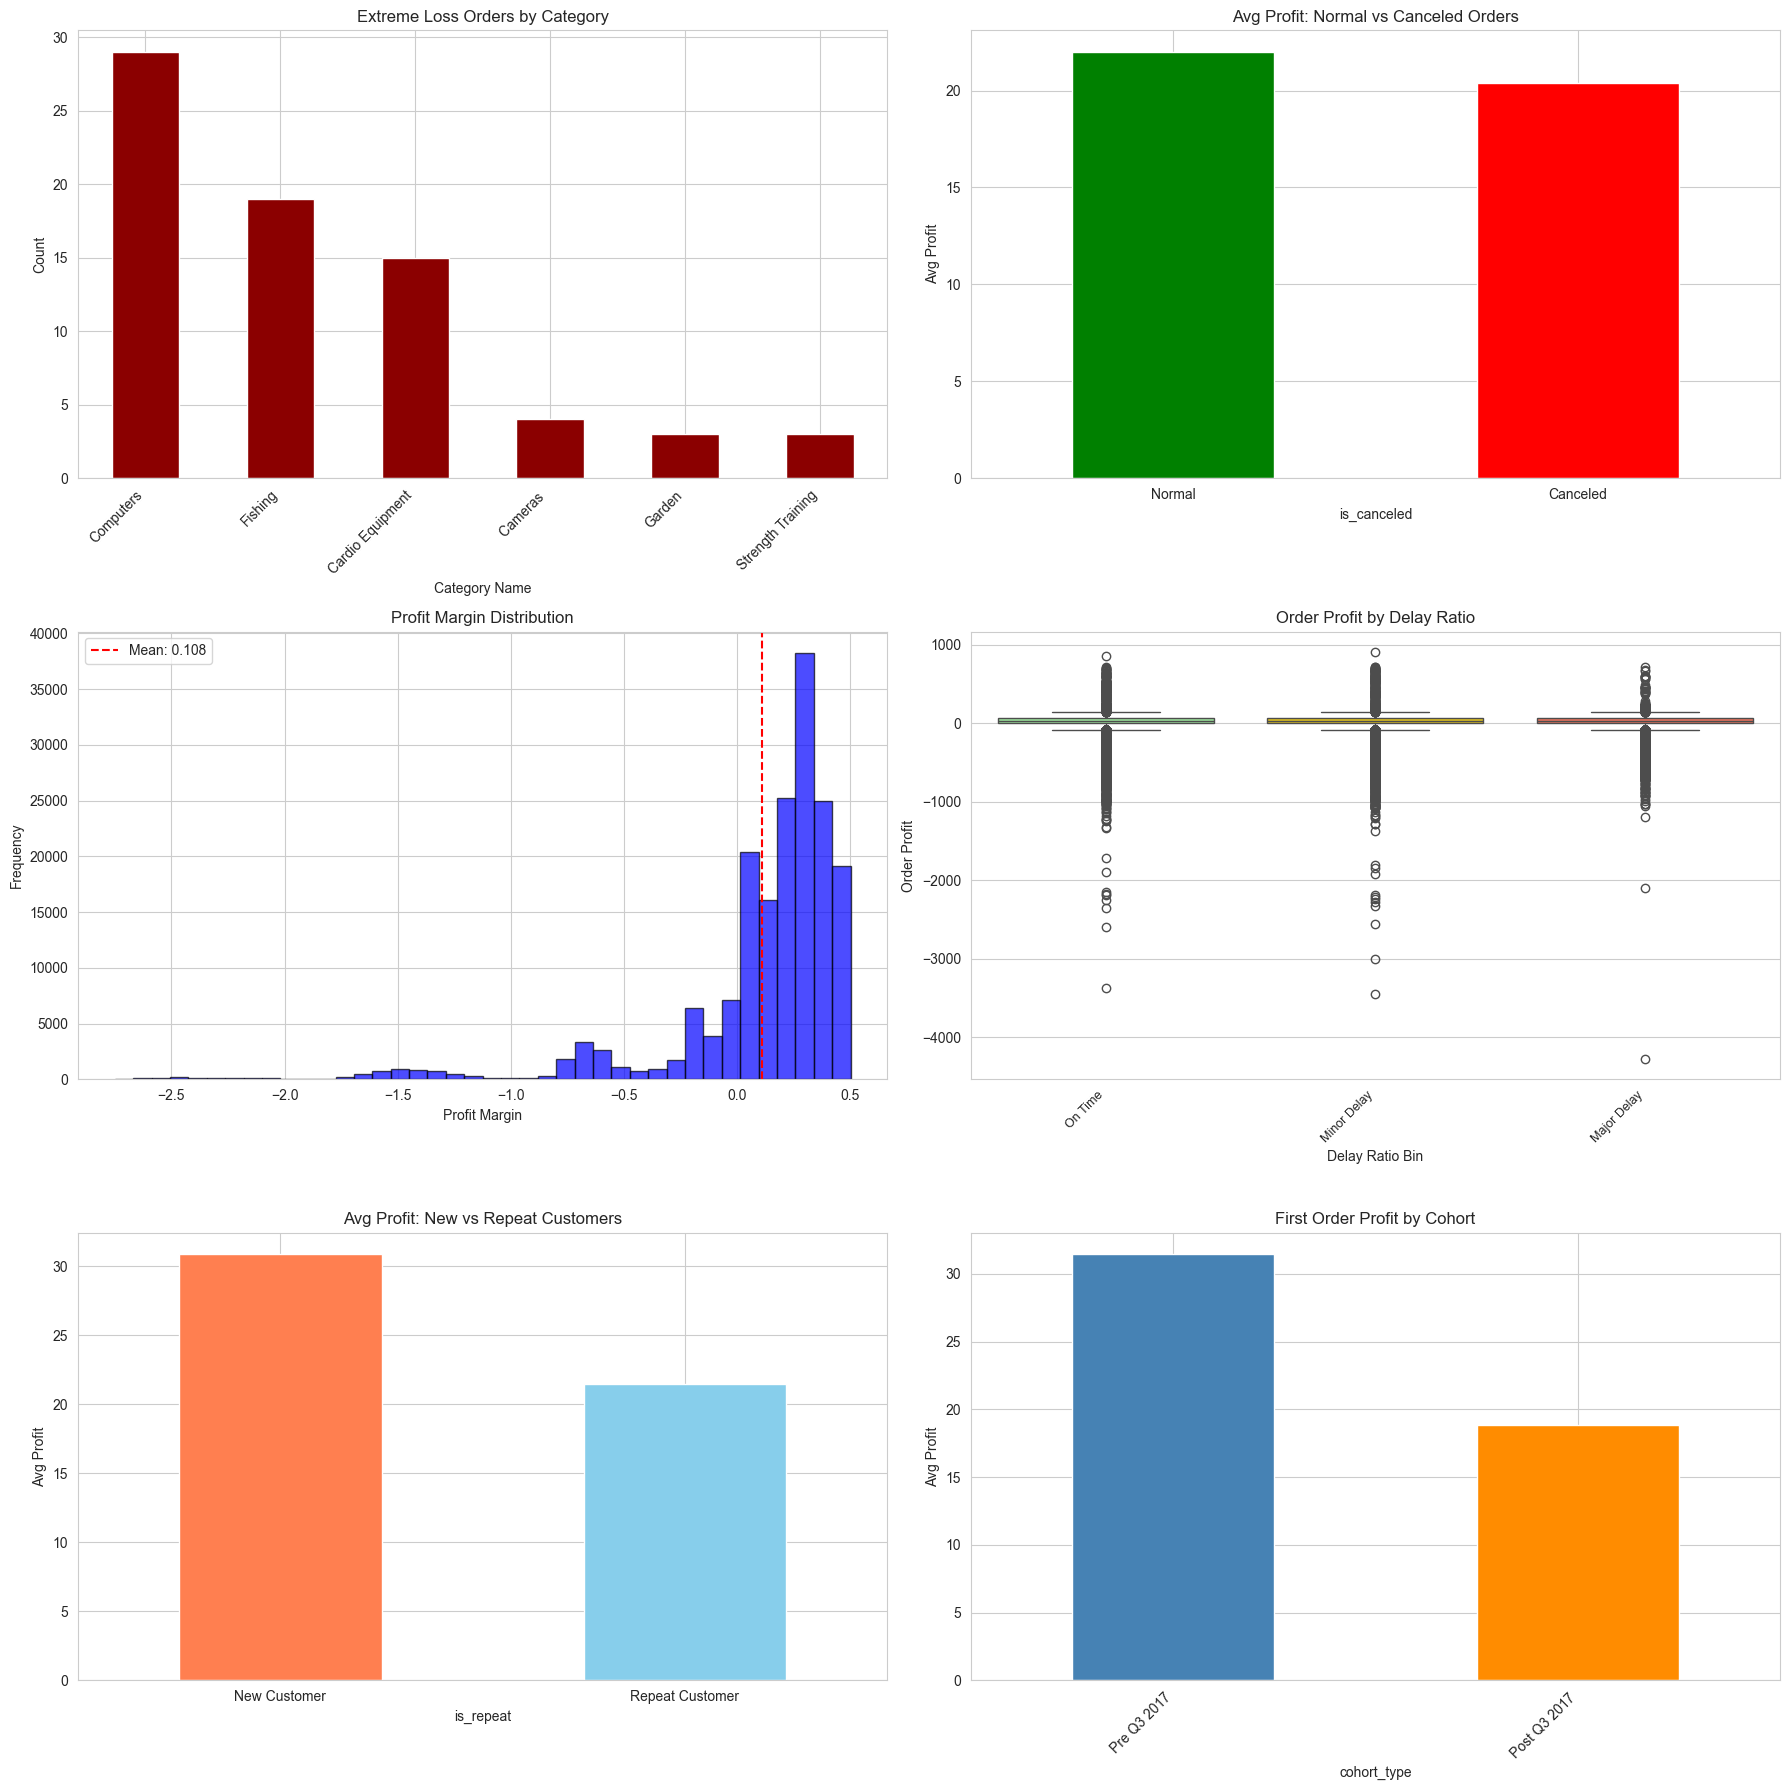


=== Key Findings Summary ===
1. Extreme loss orders ratio: 0.04%
2. Average profit from canceled orders: $20.41
3. Overall average profit margin: 0.108
4. Major delay orders ratio (delay_ratio > 2): 10.36%
5. Repeat customer ratio: 94.49%
6. New customer first order profit change after Q3 2017: $12.58


In [13]:
sns.set_style("whitegrid")

# Create a 3×2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# ===============================
# Data preprocessing and feature engineering
# ===============================
df['order date (DateOrders)']    = pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

# Compute delivery delays and relative delay ratio
df['delay_days']  = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']
df['delay_ratio'] = df['Days for shipping (real)'] / df['Days for shipment (scheduled)']

# Compute profit margin
df['profit_margin'] = df['Order Profit Per Order'] / df['Sales']

# Flag canceled orders
df['is_canceled'] = (df['Order Status'] == 'CANCELED').astype(int)

# ===============================
# Customer repeat purchase analysis
# ===============================
order_counts = (
    df
    .groupby('Customer Id')['Order Id']
    .nunique()
    .reset_index(name='order_count')
)
df = df.merge(order_counts, on='Customer Id', how='left')
df['is_repeat'] = (df['order_count'] > 1).astype(int)

# ===============================
# Cohort analysis setup: before vs after Q3 2017 cutoff
# ===============================
df['order_month']   = df['order date (DateOrders)'].dt.to_period('M')
df['cohort_cutoff'] = pd.to_datetime('2017-07-01')
df['cohort_type']   = np.where(
    df['order date (DateOrders)'] < df['cohort_cutoff'],
    'Pre_Q3_2017',
    'Post_Q3_2017'
)

# ===============================
# 1. Extreme negative-profit order by Category
# ===============================
extreme_loss = df[df['Order Profit Per Order'] < -1000]
print(f"Extreme loss orders: {len(extreme_loss)} ({len(extreme_loss)/len(df)*100:.2f}%)")

ax = axes[0, 0]
extreme_loss['Category Name'].value_counts().head(6).plot(
    kind='bar', color='darkred', ax=ax
)
ax.set_title('Extreme Loss Orders by Category', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Count')

# ===============================
# 2. Canceled vs Normal: Average Profit Comparison
# ===============================
ax = axes[0, 1]
df.groupby('is_canceled')['Order Profit Per Order'].mean().plot(
    kind='bar', color=['green', 'red'], ax=ax
)
ax.set_title('Avg Profit: Normal vs Canceled Orders', fontsize=12)
ax.set_xticklabels(['Normal', 'Canceled'], rotation=0, fontsize=10)
ax.set_ylabel('Avg Profit')

# ===============================
# 3. Profit margin distribution & mean line
# ===============================
ax = axes[1, 0]
df['profit_margin'].hist(
    bins=40, alpha=0.7, color='blue', edgecolor='black', ax=ax
)
ax.axvline(
    df['profit_margin'].mean(),
    color='red', linestyle='--',
    label=f'Mean: {df["profit_margin"].mean():.3f}'
)
ax.set_title('Profit Margin Distribution', fontsize=12)
ax.set_xlabel('Profit Margin')
ax.set_ylabel('Frequency')
ax.legend(fontsize=10)

# ===============================
# 4. Delay ratio vs Order Profit (Boxplot)
# ===============================
df['delay_ratio_bin'] = pd.cut(
    df['delay_ratio'],
    bins=[0, 1, 2, np.inf],
    labels=['On Time', 'Minor Delay', 'Major Delay']
)

ax = axes[1, 1]
sns.boxplot(
    x='delay_ratio_bin',
    y='Order Profit Per Order',
    data=df,
    palette=['lightgreen', 'gold', 'tomato'],
    ax=ax
)
ax.set_title('Order Profit by Delay Ratio', fontsize=12)
ax.set_xlabel('Delay Ratio Bin', fontsize=10)
ax.set_ylabel('Order Profit')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)

# ===============================
# 5. New vs Repeat Customer: Avg Profit Comparison
# ===============================
ax = axes[2, 0]
repeat_comparison = df.groupby('is_repeat').agg({
    'Order Profit Per Order': 'mean'
}).reset_index()
repeat_comparison.set_index('is_repeat', inplace=True)
repeat_comparison['Order Profit Per Order'].plot(
    kind='bar',
    color=['coral', 'skyblue'],
    ax=ax
)
ax.set_title('Avg Profit: New vs Repeat Customers', fontsize=12)
ax.set_xticklabels(['New Customer', 'Repeat Customer'], rotation=0, fontsize=10)
ax.set_ylabel('Avg Profit')

# ===============================
# 6. Cohort: First Order Profit Comparison (Pre vs Post Q3 2017)
# ===============================
first_orders = df.groupby('Customer Id').first().reset_index()
ax = axes[2, 1]
cohort_profit = first_orders.groupby('cohort_type')['Order Profit Per Order'].mean()
cohort_profit.plot(
    kind='bar',
    color=['steelblue', 'darkorange'],
    ax=ax
)
ax.set_title('First Order Profit by Cohort', fontsize=12)
ax.set_xticklabels(['Pre Q3 2017', 'Post Q3 2017'], rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Avg Profit')

# Display all subplots
plt.tight_layout()
plt.show()

# ===============================
# Output key statistics summary
# ===============================
print("\n=== Key Findings Summary ===")
print(f"1. Extreme loss orders ratio: {len(extreme_loss)/len(df)*100:.2f}%")
print(f"2. Average profit from canceled orders: ${df[df['is_canceled']==1]['Order Profit Per Order'].mean():.2f}")
print(f"3. Overall average profit margin: {df['profit_margin'].mean():.3f}")
print(f"4. Major delay orders ratio (delay_ratio > 2): {(df['delay_ratio'] > 2).sum()/len(df)*100:.2f}%")
print(f"5. Repeat customer ratio: {df['is_repeat'].mean()*100:.2f}%")
pre_q3_profit  = first_orders[first_orders['cohort_type']=='Pre_Q3_2017']['Order Profit Per Order'].mean()
post_q3_profit = first_orders[first_orders['cohort_type']=='Post_Q3_2017']['Order Profit Per Order'].mean()
print(f"6. New customer first order profit change after Q3 2017: ${post_q3_profit - pre_q3_profit:.2f}")


- **Extreme Loss Orders Pose High Risk**: A very small number of extremely high-loss orders are concentrated in high-value, complex product categories. Discount and return costs for these categories require urgent and focused control.
- **Canceled Orders Impact Profit**: While canceled orders may retain a small residual profit, an increasing cancellation rate can severely erode overall profitability. Return and refund processes should be continuously optimized.
- **Overall Low Profit Margins**: Most transactions operate on thin profit margins, making them vulnerable to losses from returns or additional compensation. The focus should be on guiding more orders into healthy profit margin tiers and individually scrutinizing loss-making orders.
- **Severe Delays Increase Risk**: Orders with shipping delays exceeding twice the scheduled time are more prone to significant losses. Management of high-risk logistics commitments and remedial processes needs to be strengthened.
- **Repeat Customer Profitability Needs Improvement**: Repeat customer ratio is as high as 94.49%.While repeat customers offer stable contributions, their per-order profit is relatively low. Strategies such as bundling or value-added services should be explored to increase their average transaction profit.
- **New Customer Acquisition vs. Profit**: The significant decline in first-order profitability for new customers during critical periods indicates that aggressive promotional offers for customer acquisition are simultaneously compressing profits. A balance must be struck between acquiring new users and maintaining reasonable profit margins.

## 3.2 Univariate



1. **Discount × Delay Combined Impact** - identify the riskiest order combinations.
2. **Discount × Category Interaction Effect** - Analyze differences in product category sensitivity to discounts, identifying which categories can maintain profitability even with high discounts.
3. **Price × Discount Multi-dimensional Analysis** - Construct a cross-matrix of price ranges and discount levels to identify the extent of profit erosion in high-risk combinations like "high price, high discount."
4. **Delay Rate × Shipping Mode** - Analyze the tolerance for delays across different shipping services, with particular attention to the delay sensitivity of premium services (e.g., Same Day).
5. **Customer Type × Discount Strategy** - Compare the profit performance of new vs. returning customers at different discount levels to optimize differentiated pricing strategies.
6. **Region × Category Bubble Chart** - Use a bubble chart to display the three-dimensional relationship of sales, profit, and order volume for region-category combinations, identifying star performers and problematic combinations.



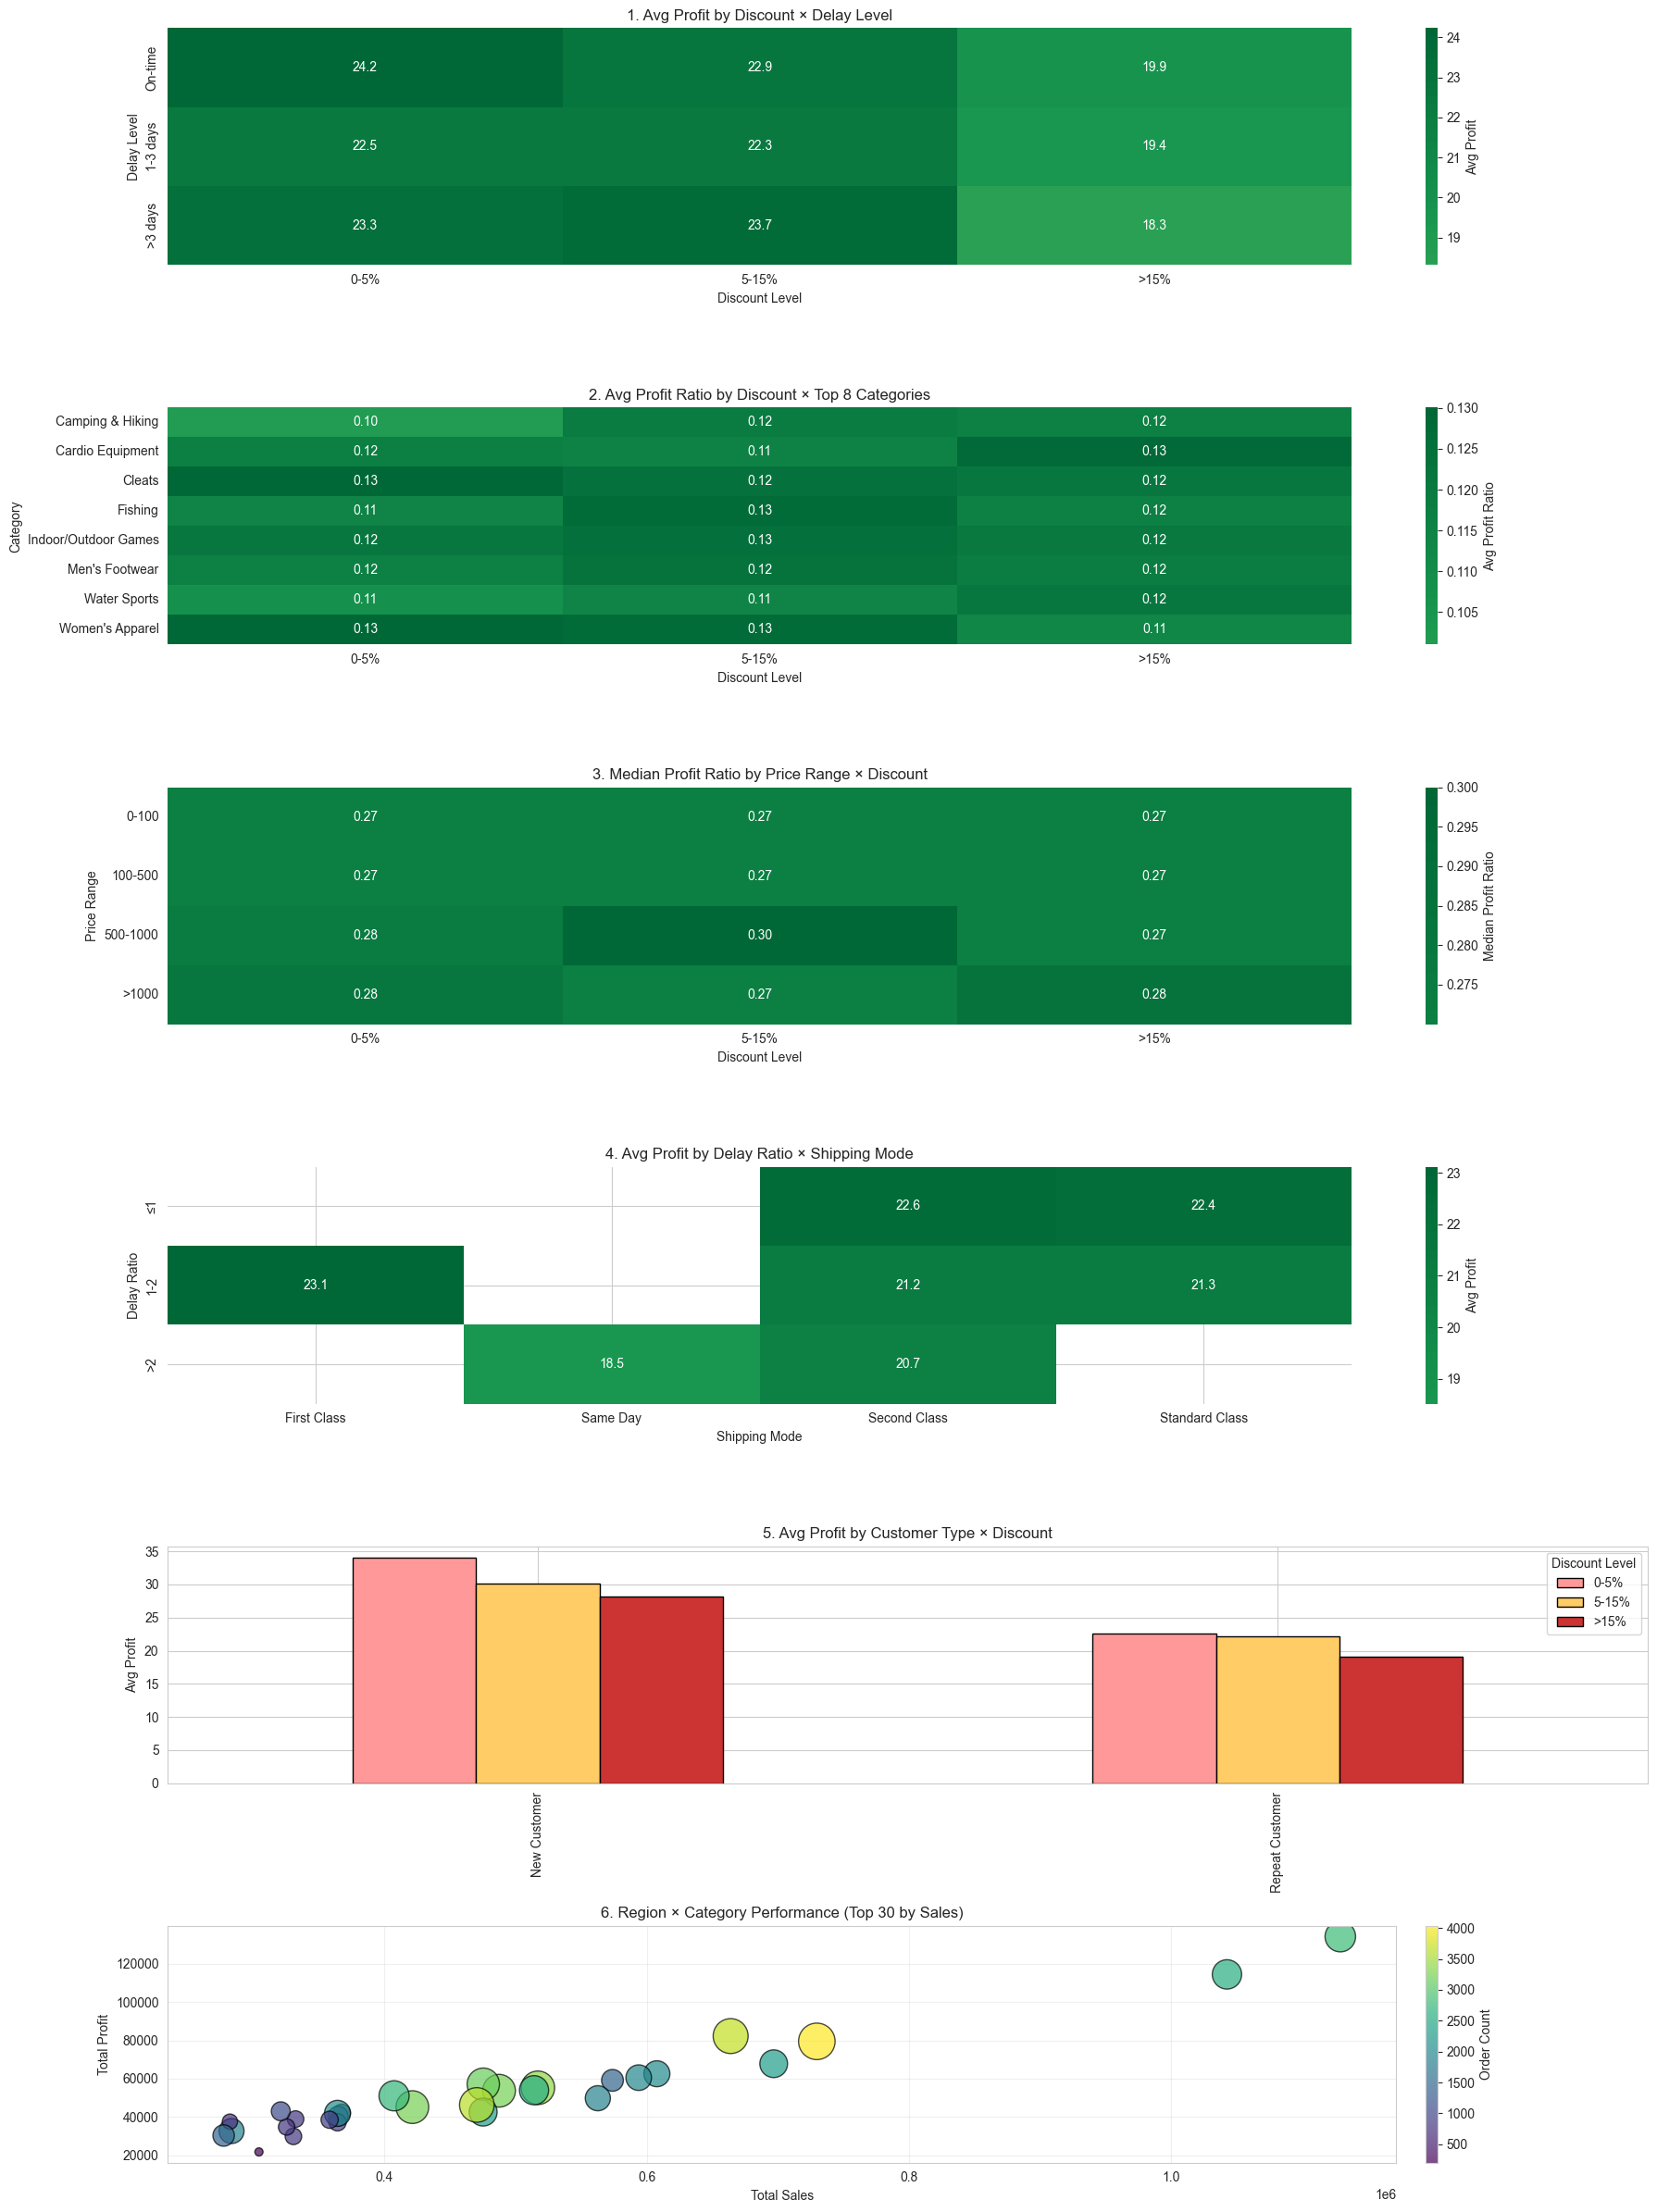


=== Bivariate Analysis Key Findings ===
1. Discount×Delay Interaction: Worst avg profit: 18.3, Best: 24.2
2. Discount×Category (Top 8): Lowest avg profit ratio: 0.10, Highest: 0.13
3. Price>1000 & Discount>15% median profit ratio: 0.28
4. Same Day with delay_ratio>2 avg profit: 18.5
5. New customer overall avg profit: 30.9, Repeat customer: 21.5
6. Top Region×Category (by Sales): Central America×Fishing  Sales=1128744, Profit=134268


In [18]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (18, 24)

# Assume df is already loaded and basic cleaning completed
# Convert discount and profit ratio columns to numeric, compute delays
df['Order Item Discount Rate'] = pd.to_numeric(df['Order Item Discount Rate'], errors='coerce')
df['delay_days'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']
df['delay_ratio'] = df['Days for shipping (real)'] / df['Days for shipment (scheduled)']
df['Order Item Profit Ratio'] = pd.to_numeric(df['Order Item Profit Ratio'], errors='coerce')

# Create discount bins
df['discount_bin'] = pd.cut(
    df['Order Item Discount Rate'],
    bins=[0, 0.05, 0.15, 1.0],
    labels=['0-5%', '5-15%', '>15%']
)

# Create delay level bins
df['delay_level'] = pd.cut(
    df['delay_days'],
    bins=[-np.inf, 0, 3, np.inf],
    labels=['On-time', '1-3 days', '>3 days']
)

# Create price bins
df['price_bin'] = pd.cut(
    df['Order Item Product Price'],
    bins=[0, 100, 500, 1000, np.inf],
    labels=['0-100', '100-500', '500-1000', '>1000']
)

# Create delay ratio bins
df['delay_ratio_bin'] = pd.cut(
    df['delay_ratio'],
    bins=[0, 1, 2, np.inf],
    labels=['≤1', '1-2', '>2']
)

# Mark repeat customers
order_counts = df.groupby('Customer Id')['Order Id'].nunique().reset_index(name='order_count')
df = df.merge(order_counts, on='Customer Id', how='left')
df['is_repeat'] = (df['order_count'] > 1).astype(int)

# ==============================
# Simplified Bivariate Visualizations: 6 Subplots
# ==============================
fig, axes = plt.subplots(6, 1, figsize=(18, 24))
plt.subplots_adjust(hspace=0.6)

# 1. Discount × Delay Interaction on Profit (Heatmap)
pivot1 = df.pivot_table(
    values='Order Profit Per Order',
    index='delay_level',
    columns='discount_bin',
    aggfunc='mean'
)
sns.heatmap(
    pivot1,
    annot=True, fmt='.1f', center=0,
    cmap='RdYlGn', cbar_kws={'label': 'Avg Profit'},
    ax=axes[0]
)
axes[0].set_title('1. Avg Profit by Discount × Delay Level')
axes[0].set_xlabel('Discount Level')
axes[0].set_ylabel('Delay Level')

# 2. Discount × Category Impact on Profit Ratio (Top 8 Categories, Heatmap)
top8 = df['Category Name'].value_counts().head(8).index
df_top8 = df[df['Category Name'].isin(top8)]
pivot2 = df_top8.pivot_table(
    values='Order Item Profit Ratio',
    index='Category Name',
    columns='discount_bin',
    aggfunc='mean'
)
sns.heatmap(
    pivot2,
    annot=True, fmt='.2f', center=0,
    cmap='RdYlGn', cbar_kws={'label': 'Avg Profit Ratio'},
    ax=axes[1]
)
axes[1].set_title('2. Avg Profit Ratio by Discount × Top 8 Categories')
axes[1].set_xlabel('Discount Level')
axes[1].set_ylabel('Category')

# 3. Price × Discount Impact on Median Profit Ratio (Heatmap)
pivot3 = df.pivot_table(
    values='Order Item Profit Ratio',
    index='price_bin',
    columns='discount_bin',
    aggfunc='median'
)
sns.heatmap(
    pivot3,
    annot=True, fmt='.2f', center=0,
    cmap='RdYlGn', cbar_kws={'label': 'Median Profit Ratio'},
    ax=axes[2]
)
axes[2].set_title('3. Median Profit Ratio by Price Range × Discount')
axes[2].set_xlabel('Discount Level')
axes[2].set_ylabel('Price Range')

# 4. Delay Ratio × Shipping Mode Impact on Profit (Heatmap)
pivot4 = df.pivot_table(
    values='Order Profit Per Order',
    index='delay_ratio_bin',
    columns='Shipping Mode',
    aggfunc='mean'
)
sns.heatmap(
    pivot4,
    annot=True, fmt='.1f', center=0,
    cmap='RdYlGn', cbar_kws={'label': 'Avg Profit'},
    ax=axes[3]
)
axes[3].set_title('4. Avg Profit by Delay Ratio × Shipping Mode')
axes[3].set_xlabel('Shipping Mode')
axes[3].set_ylabel('Delay Ratio')

# 5. Customer Type × Discount Impact on Average Profit (Bar Chart)
pivot5 = df.groupby(['is_repeat', 'discount_bin'])['Order Profit Per Order'].mean().unstack()
pivot5.plot(
    kind='bar',
    ax=axes[4],
    color=['#FF9999', '#FFCC66', '#CC3333'],
    edgecolor='black'
)
axes[4].set_xticks([0, 1])
axes[4].set_xticklabels(['New Customer', 'Repeat Customer'])
axes[4].set_title('5. Avg Profit by Customer Type × Discount')
axes[4].set_xlabel('')
axes[4].set_ylabel('Avg Profit')
axes[4].legend(title='Discount Level')

# 6. Region × Category Performance (Bubble Chart: Sales vs. Profit vs. Order Count)
agg6 = df.groupby(['Order Region', 'Category Name']).agg({
    'Sales': 'sum',
    'Order Profit Per Order': 'sum',
    'Order Id': 'count'
}).reset_index()
agg6 = agg6.rename(columns={'Sales': 'Total_Sales',
                            'Order Profit Per Order': 'Total_Profit',
                            'Order Id': 'Order_Count'})
top30 = agg6.nlargest(30, 'Total_Sales')

scatter = axes[5].scatter(
    x=top30['Total_Sales'],
    y=top30['Total_Profit'],
    s=top30['Order_Count'] / 5,   # Bubble size proportional to order count
    c=top30['Order_Count'],
    cmap='viridis', alpha=0.7, edgecolor='black'
)
axes[5].set_title('6. Region × Category Performance (Top 30 by Sales)')
axes[5].set_xlabel('Total Sales')
axes[5].set_ylabel('Total Profit')
cbar = fig.colorbar(scatter, ax=axes[5], pad=0.02)
cbar.set_label('Order Count')
axes[5].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ==============================
# Brief Summary of Key Findings
# ==============================
print("\n=== Bivariate Analysis Key Findings ===")

# 1. Discount × Delay
min_profit = pivot1.min().min()
max_profit = pivot1.max().max()
print(f"1. Discount×Delay Interaction: Worst avg profit: {min_profit:.1f}, Best: {max_profit:.1f}")

# 2. Discount × Category
min_pr_cat = pivot2.min().min()
max_pr_cat = pivot2.max().max()
print(f"2. Discount×Category (Top 8): Lowest avg profit ratio: {min_pr_cat:.2f}, Highest: {max_pr_cat:.2f}")

# 3. Price × Discount
mp_high_price = pivot3.loc['>1000', '>15%'] if '>1000' in pivot3.index and '>15%' in pivot3.columns else np.nan
print(f"3. Price>1000 & Discount>15% median profit ratio: {mp_high_price:.2f}")

# 4. Delay Ratio × Shipping Mode
md_same_day = pivot4.loc['>2', 'Same Day'] if '>2' in pivot4.index and 'Same Day' in pivot4.columns else np.nan
print(f"4. Same Day with delay_ratio>2 avg profit: {md_same_day:.1f}")

# 5. Customer Type × Discount
avg_new = df[df['is_repeat']==0]['Order Profit Per Order'].mean()
avg_rep = df[df['is_repeat']==1]['Order Profit Per Order'].mean()
print(f"5. New customer overall avg profit: {avg_new:.1f}, Repeat customer: {avg_rep:.1f}")

# 6. Top Region × Category
top = top30.iloc[0]
print(f"6. Top Region×Category (by Sales): {top['Order Region']}×{top['Category Name']}  Sales={top['Total_Sales']:.0f}, Profit={top['Total_Profit']:.0f}")


1. Big discounts + big delays lose the most: Even moderate delays under heavy discounts cause profits to drop sharply.

2. High‐margin categories can handle bigger discounts; low‐margin categories need tighter discount control.

3. Mid‐ and high‐price items have enough markup to survive deep discounts; small‐ticket items’ profits stay more fixed.

4. If “express” delivery is late, losses are greatest; standard shipping can handle minor delays more easily.

5. New customers still generate strong profits even with big discounts; repeat customers already have lower margins, so deep discounts can push them into losses.

6. Central America × Fishing is the top‐earning combination and should get priority investment; mid‐tier combos can learn from it; low‐volume, low‐profit combos need reevaluation.
